Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


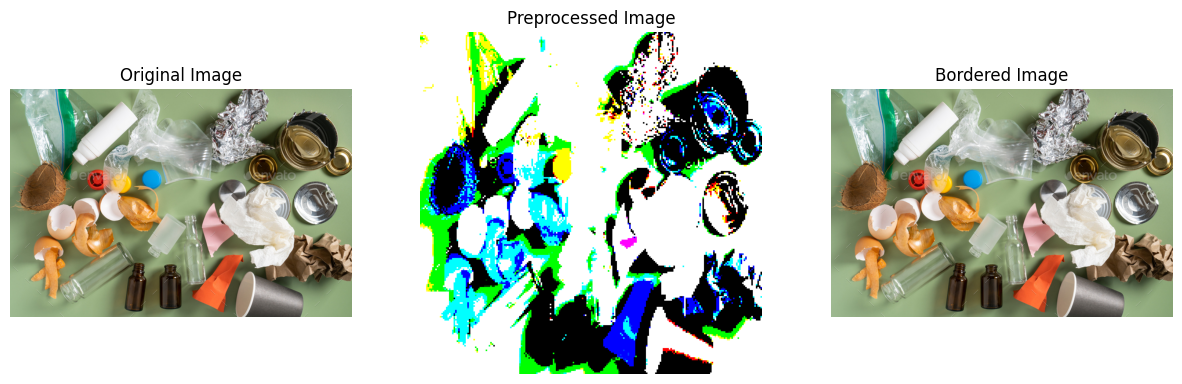

1/1 [==============================] - 3s 3s/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Predicted waste material: organic
Predicted waste material: paper
Predicted waste material: plastic


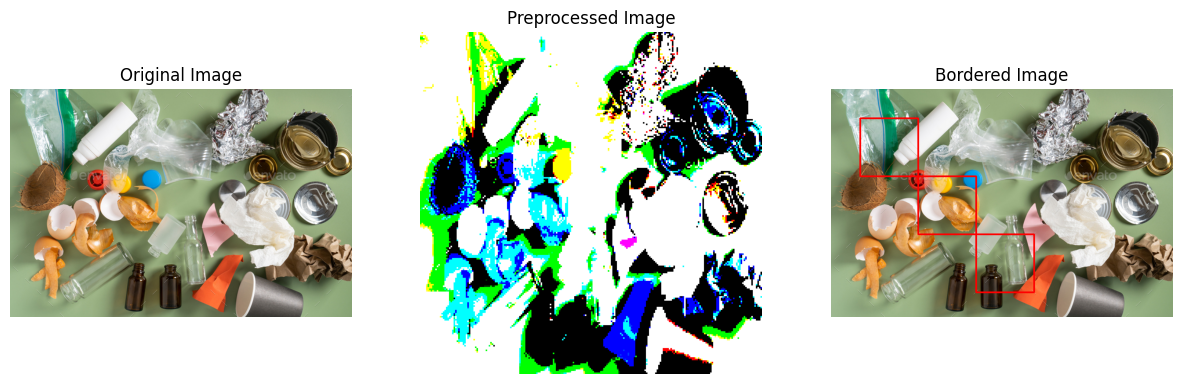

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet import preprocess_input
from tensorflow.keras.models import load_model
from PIL import Image
import cv2

model_path = "C:\\Users\\Sheetali\\garbage classifier\\garbage_classifier.resnet152.h5"
output_class = ["battery", "glass", "metal", "organic", "paper", "plastic"]

model = load_model(model_path)

def preprocessing_input(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    return img

def plot_images(original, preprocessed, bordered_img):
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    axs[0].imshow(original)
    axs[0].set_title('Original Image')
    axs[0].axis('off')
    preprocessed = np.squeeze(preprocessed, axis=0)
    axs[1].imshow(preprocessed)
    axs[1].set_title('Preprocessed Image')
    axs[1].axis('off')
    axs[2].imshow(bordered_img)
    axs[2].set_title('Bordered Image')
    axs[2].axis('off')
    plt.show()

def predict_user(img_path):
    original_img = Image.open(img_path)
    img = preprocessing_input(img_path)
    plot_images(original_img, img, original_img.copy())
    predicted_array = model.predict(img)[0]
    predicted_classes = np.argsort(predicted_array)[::-1]
    top_n = 3

    bordered_img = np.array(original_img)
    for i in range(top_n):
        predicted_value = output_class[predicted_classes[i]]
        predicted_accuracy = round(predicted_array[predicted_classes[i]] * 100, 2)
        print("Predicted waste material:", predicted_value)

        if i == 0:
            x, y, w, h = 50, 50, 100, 100
        elif i == 1:
            x, y, w, h = 150, 150, 100, 100
        elif i == 2:
            x, y, w, h = 250, 250, 100, 100

        cv2.rectangle(bordered_img, (x, y), (x + w, y + h), (255, 0, 0), 2)

    plot_images(original_img, img, bordered_img)

predict_user("C:\\Users\\Sheetali\\garbage classifier\\Sorting-05622.jpg")
